 <font size=6> **实验8 SVM(2)**</font>

* 理解线性可分SVM、线性支持SVM算法追求目标及求解基本思路；
* 理解在低维空间线性不可分时，采用核函数映射到高维空间变成线性可分的技巧；
* 掌握LinearSVC和SVC的基本用法，理解重要参数、属性、方法使用；
* 能够用多种方法画出分离超平面(线)、边界面(线)；
* 掌握用网格搜索等方法进行调参。


**题目：**  
请参照lab_8_2思路，根据下列要求，编程完成相应任务：
* (1)请使用make_moons()生成n_samples=600,noise=0.3 的数据集，并绘制散点图  
* (2)先将数据集按80%:20%比例划分训练集、测试集；再以默认值方式创建SVC类对象，之后进行训练、测试，输出测试集的准确率、分类报告和包含分离曲线、边界线的散点图：
* (3)使用GridSearchCV进行调参，要求：'kernel':('linear','poly','rbf'), 'C':[0.1,1, 5, 10,50,100]}  
找出较优的参数组合，再进行训练、测试，输出测试集的准确率、分类报告和包含分离曲线、边界线的散点图


# 导入库

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 数据处理

## 生成数据  
(将随机种子设置为0 random_state=0)

In [5]:
X, y = make_moons(n_samples=600, noise=0.3, random_state = 0)

## 可视化查看数据

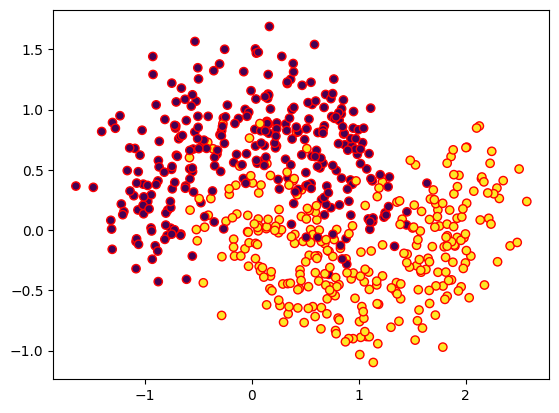

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, edgecolor = 'r')
plt.show()

# 建模  


## 划分数据集

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 模型训练

In [11]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [24]:
svc.C, svc.kernel

(1.0, 'rbf')

## 模型评估

In [12]:
svc.score(X_test, y_test)

0.875

In [15]:
print('测试机准确率:', accuracy_score(y_test, svc.predict(X_test)))
print('测试集分类报告', classification_report(y_test, svc.predict(X_test)))

测试机准确率: 0.875
测试集分类报告               precision    recall  f1-score   support

           0       0.85      0.92      0.88        62
           1       0.91      0.83      0.86        58

    accuracy                           0.88       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120



## 模型效果可视化

参考 理论课课件\第8讲SVM(2)\code_8\SVC使用(画分离直线及边界线).ipynb

In [17]:
def plot_svc_decision_function(model, XX,YY,ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    plt.scatter(XX[:, 0], XX[:, 1], c=YY, s=50, cmap='autumn')
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

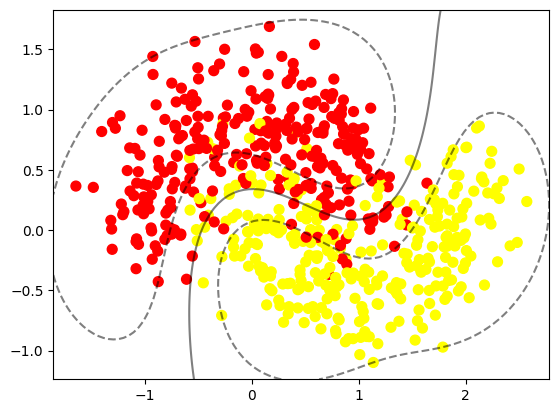

In [18]:
plot_svc_decision_function(svc, X, y)

## 参数调优

In [34]:
params = {'kernel': ('linear', 'poly', 'rbf'), 'C': [0.1, 1, 5, 10, 50, 100]}
grid_search = GridSearchCV(svc, params, cv=5)

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'kernel': ('linear', 'poly', 'rbf')})

In [36]:
grid_search.best_params_

{'C': 100, 'kernel': 'rbf'}

In [37]:
best_model = grid_search.best_estimator_

## 调优参数后可视化模型效果

In [38]:
print('测试集准确率:', accuracy_score(y_test, best_model.predict(X_test)))
print('测试集分类报告:\n', classification_report(y_test, best_model.predict(X_test)))

测试集准确率: 0.9
测试集分类报告:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        62
           1       0.94      0.84      0.89        58

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



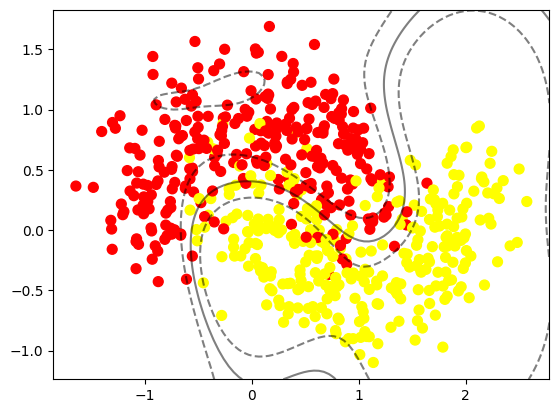

In [40]:
plot_svc_decision_function(best_model, X, y)